How Important are First Impressions? A look at the Bachelor Franchise.

The Bachelor is a popular reality TV series that has been on the air since 2002.  Each season, dozens of contestants vie for the heart of either the Bachelor or Bachelorette, hoping to be the last one standing. 

Every season in epsiode 1 Bachelor or Bachelorette, there is much fanfare over the first impression rose. This rose is the first one given out each season, to the contestant the Bachelor or Bachelorette likes the most. It marks them safe from elimination that evening, but inevitably puts pressure on that contestant going forward into the competition. While getting this rose indicates some intial attraction, does it make you more likely to win the season? 

Here are some questions we are interested in answering:
1. How many contestants both got a first impression rose and ended up winning? What does this say about the odds of winning given the contestant received a first impression rose? How does this compare to everyone else's odds?
2. How many contestants who got a first impression rose were controversial enough to get eliminated on a 2-on-1 date?
3. How many 1-on-1 dates did each first impression rose recipient get? How does this compare to the other contestants?
4. Are there any differences in the above questions for bachelors vs bachelorettes?

And, as an unrelated bonus, what are the most common names of contestants who've appeared on the show?

Data Source: https://github.com/fivethirtyeight/data/tree/master/bachelorette

In [1]:
#Importing libraries relevant to the analysis and graphing:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Reading in the bachelor franchise data and examining the top 5 rows:
thebach = pd.read_csv('bachelorette.csv')
thebach.head()

,SHOW,SEASON,CONTESTANT,ELIMINATION-1,ELIMINATION-2,ELIMINATION-3,ELIMINATION-4,ELIMINATION-5,ELIMINATION-6,ELIMINATION-7,...,DATES-1,DATES-2,DATES-3,DATES-4,DATES-5,DATES-6,DATES-7,DATES-8,DATES-9,DATES-10
0,SHOW,SEASON,ID,1,2,3,4,5,6,7,...,1,2,3,4,5,6,7,8,9,10
1,Bachelorette,13,13_BRYAN_A,R1,NaN,NaN,R,R,NaN,R,...,NaN,NaN,D6,D13,D1,D7,D1,D1,D1,D1
2,Bachelorette,13,13_PETER_K,NaN,R,NaN,NaN,NaN,R,R,...,NaN,D1,D6,D13,D9,D7,D1,D1,D1,D1
3,Bachelorette,13,13_ERIC_B,NaN,NaN,R,NaN,NaN,R,R,...,NaN,D10,D8,D13,D9,D1,D3,D1,D1,NaN
4,Bachelorette,13,13_DEAN_U,NaN,R,NaN,R,NaN,NaN,R,...,NaN,D8,D8,D1,D9,D7,D1,D1,NaN,NaN


First, let's get rid of the rows with column headings in them, such as what we see in row 0. There are multiples of these rows in the dataset. Let's filter these rows out using the word "SEASON."

In [2]:
#filtering out rows with headers:
thebach = thebach.loc[thebach.SEASON!='SEASON',:]

Then, lets rename the column headings, which have a dash in them, to include an underscore instead. This follows the popular convention for column labeling.

In [3]:
#replacing - with _
thebach.columns=thebach.columns.str.replace('-','_')

Now let's take a look at the data types in each column, to see if anything can be changed. For example, columns that are numerical but are coded as strings (Objects).

In [4]:
#printing the data types of each column
thebach.dtypes

SHOW              object
SEASON            object
CONTESTANT        object
ELIMINATION_1     object
ELIMINATION_2     object
ELIMINATION_3     object
ELIMINATION_4     object
ELIMINATION_5     object
ELIMINATION_6     object
ELIMINATION_7     object
ELIMINATION_8     object
ELIMINATION_9     object
ELIMINATION_10    object
DATES_1           object
DATES_2           object
DATES_3           object
DATES_4           object
DATES_5           object
DATES_6           object
DATES_7           object
DATES_8           object
DATES_9           object
DATES_10          object
dtype: object

In [5]:
#Changing the SEASON column to numerical data type:
thebach.SEASON = thebach.SEASON.astype(int)
thebach.SEASON.dtypes

dtype('int64')

Next, let's clean the CONTESTANT column. Each contestant's name has a prefix for the season number, which we do not need. Let's also split this column into two, one with the first initials, and one with last names.

In [6]:
#Getting rid of the season number prefix:
season_no = '[0-9]+_'
thebach.CONTESTANT = thebach.CONTESTANT.str.replace(season_no,'')

#Separating the first and last name into two separate columns, and dropping the original 
#CONTESTANT column. A few of the contestants' names are in the format "First Last" instead of
#"First_Last", so need to have all names in the same format:
thebach.CONTESTANT = thebach.CONTESTANT.str.replace('.','').str.replace(' ','_')
thebach.insert(2, 'CONTESTANT_FIRST',  thebach.CONTESTANT.str.split('_', expand=True)[0])
thebach.insert(3, 'CONTESTANT_LAST',  thebach.CONTESTANT.str.split('_', expand=True)[1])
thebach.drop('CONTESTANT',axis = 1,inplace=True)
thebach.head()

,SHOW,SEASON,CONTESTANT_FIRST,CONTESTANT_LAST,ELIMINATION_1,ELIMINATION_2,ELIMINATION_3,ELIMINATION_4,ELIMINATION_5,ELIMINATION_6,...,DATES_1,DATES_2,DATES_3,DATES_4,DATES_5,DATES_6,DATES_7,DATES_8,DATES_9,DATES_10
1,Bachelorette,13,BRYAN,A,R1,NaN,NaN,R,R,NaN,...,NaN,NaN,D6,D13,D1,D7,D1,D1,D1,D1
2,Bachelorette,13,PETER,K,NaN,R,NaN,NaN,NaN,R,...,NaN,D1,D6,D13,D9,D7,D1,D1,D1,D1
3,Bachelorette,13,ERIC,B,NaN,NaN,R,NaN,NaN,R,...,NaN,D10,D8,D13,D9,D1,D3,D1,D1,NaN
4,Bachelorette,13,DEAN,U,NaN,R,NaN,R,NaN,NaN,...,NaN,D8,D8,D1,D9,D7,D1,D1,NaN,NaN
5,Bachelorette,13,ADAM,G,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,D10,D8,D13,D9,D7,D3,NaN,NaN,NaN


The data cleaning is complete. Now let's attempt to answer some questions posed at the beginning of the project. To start, how many contestants both got a first impression rose and ended up winning? And how does this compare to everyone else's odds?

In [7]:
#Splitting the dataset into two dataframes, one for those contestants who got a first 
#impression rose, and one for those who didn't:
first_impression = thebach.loc[thebach.ELIMINATION_1=='R1',:]
everyone_else = thebach.loc[thebach.ELIMINATION_1 !='R1',:]

#Sorting and looking at the top rows of the first impression dataframe:
first_impression = first_impression.sort_values('SEASON', ascending=True)
first_impression.head(5)

,SHOW,SEASON,CONTESTANT_FIRST,CONTESTANT_LAST,ELIMINATION_1,ELIMINATION_2,ELIMINATION_3,ELIMINATION_4,ELIMINATION_5,ELIMINATION_6,...,DATES_1,DATES_2,DATES_3,DATES_4,DATES_5,DATES_6,DATES_7,DATES_8,DATES_9,DATES_10
281,Bachelorette,3,KEITH,None,R1,NaN,E,NaN,NaN,NaN,...,NaN,D1,D6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
259,Bachelorette,4,RICHARD,M,R1,NaN,ED,NaN,NaN,NaN,...,NaN,D7,D1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
250,Bachelorette,4,JEREMY,A,R1,R,NaN,NaN,NaN,NaN,...,NaN,D7,D10,D6,D1,D1,D1,NaN,NaN,NaN
248,Bachelorette,4,JESSE,C,R1,NaN,NaN,R,NaN,NaN,...,NaN,D7,D10,D1,D4,D1,D1,D1,NaN,NaN
796,Bachelor,5,TRISH,S,R1,NaN,NaN,NaN,E,NaN,...,NaN,D1,D2,D3,D1,NaN,NaN,NaN,NaN,NaN


A first impression rose is denoted by an R1 in the ELIMINATION_1 column. As an aside, there usually is one first impression rose per season, so what happened in seasons where the data shows more than one? A quick look at the Bachelor wiki (https://bachelor-nation.fandom.com/wiki/First_Impression_Rose) confirms that in these seasons, the Bachelor/Bachelorette went against tradition and gave out multiple roses before the first elimination!

In [8]:
#Filtering the first impression rose data for contestants who also won the 
#entire season:
fi_winners = first_impression[first_impression.iloc[:,4:14].isin(['W']).any(axis=1)]

#Printing the stats:
print('Total number of winners who had first impression rose:',fi_winners.CONTESTANT_FIRST.count())
print('\n')
print('Number from the Bachelor vs Bachelorette:',fi_winners.SHOW.value_counts())
print('\n')
#Calculating the percentage of these winners out of everyone who has won:
winners = thebach[thebach.iloc[:,4:14].isin(['W']).any(axis=1)]
print('Percentage of winners who had a first impression rose: {:.2%}'.format(fi_winners.shape[0]/winners.shape[0]))

Total number of winners who had first impression rose: 7


Number from the Bachelor vs Bachelorette: Bachelorette    5
Bachelor        2
Name: SHOW, dtype: int64


Percentage of winners who had a first impression rose: 21.21%


In the entirety of Bachelor franchise history, 7 contestants have both gotten a first impression rose and gone on to win the season! That is about 1/5th of everyone who has won either the Bachelor or Bachelorette (33 people). There are more of these winners from the Bachelorette than the Bachelor. 

Now, given that a contestant has already received the first impression rose, how often have they won? And how does that compare to the other contestants?

In [9]:
#Dividing the number of winners out of the first impressions dataset:
print('Odds of winning if you have received impression rose: {:.2%}'.format(fi_winners.shape[0]/first_impression.shape[0]))

Odds of winning if you have received impression rose: 15.56%


In [10]:
#Filtering on the number of winners out of the everyone_else dasaset:
ee_winners = everyone_else[everyone_else.iloc[:,4:14].isin(['W']).any(axis=1)]

#Dividing that by the total number of other contestants:
print('Odds of winning if you never received one: {:.2%}'.format(ee_winners.shape[0]/everyone_else.shape[0]))

Odds of winning if you never received one: 3.09%


This paints an interesting picture of the odds of winning given you either received a first impression rose, or didn't. For those who did receive a first impression rose, they have won approximately 15% of the time. But by not receiving a first impression rose, they had around a 3% chance of winning the season.

There are between 20 and 30 contestants each season, which is variable. Therefore at the start, any contestants odds of winning are dependant on the number of competitors, but are generally between 3.3 and 5%. But getting a first impression rose, which means you've caught the Bachelor or Bachelorette's eye after the first night of meet-and-greets, raises your odds considerably. 

Now, question 2: what are the first impression rose winner's odds of getting eliminated on the dreaded 2-on-1 date? This date occurs every season, where 2 contestants go on a date with the Bachelor/Bachelorette, and only one comes back to the mansion to continue the season. This is usually reserved for the most controversial contestants. We would expect this to be a very low percentage.

In [11]:
#Filtering on contestants who got a first impression rose and went on a 2-on-1 date:
two_one = first_impression.loc[(first_impression.ELIMINATION_1=='R1') & first_impression.isin(['D2']).any(axis=1),:]

#Filtering the resulting dataframe on who got eliminated on a date:
two_one.loc[two_one.isin(['ED']).any(axis=1),:]

,SHOW,SEASON,CONTESTANT_FIRST,CONTESTANT_LAST,ELIMINATION_1,ELIMINATION_2,ELIMINATION_3,ELIMINATION_4,ELIMINATION_5,ELIMINATION_6,...,DATES_1,DATES_2,DATES_3,DATES_4,DATES_5,DATES_6,DATES_7,DATES_8,DATES_9,DATES_10
122,Bachelorette,9,BEN,S,R1,R,NaN,NaN,ED,NaN,...,NaN,D14,D10,D10,D2,NaN,NaN,NaN,NaN,NaN
114,Bachelorette,9,DREW,K,R1,NaN,NaN,NaN,NaN,R,...,NaN,D14,D10,D10,D7,D1,D2,D1,D1,D1
589,Bachelor,13,NIKKI,K,R1,NaN,NaN,ED,NaN,NaN,...,NaN,D8,D8,D2,NaN,NaN,NaN,NaN,NaN,NaN
534,Bachelor,15,ASHLEY,S,R1,NaN,R,NaN,ED,NaN,...,NaN,NaN,D1,D9,D2,NaN,NaN,NaN,NaN,NaN
481,Bachelor,17,JACKIE,[,R1,NaN,NaN,NaN,ED,NaN,...,NaN,NaN,D12,D8,D2,NaN,NaN,NaN,NaN,NaN
390,Bachelor,20,OLIVIA,C,R1,R,NaN,NaN,R,ED,...,NaN,D6,D12,D12,D9,D2,NaN,NaN,NaN,NaN


A quick scan of the data reveals that of the 45 contestants to receive a first impression rose, only 6 went on the dreaded 2-on-1 date. Out of these 6 people, 5 were eliminated on the 2-on-1, and the last was eliminated in a later rose (elimination) ceremony. So that is 11.11% of first impression rose winners who've gotten eliminated this way. Surprisingly, that is not much lower than a first impression rose recipient's odds of winning. 

On to question 3. On average, how many 1-on-1 dates did first impression rose recipients get? This is a date where the contestant gets the Bachelor/Bachelorette all to themselves for an entire day and evening. And how does this compare with 1-on-1 time for the rest of the contestants? This is denoted by the D1 code under Dates 1 through 10.

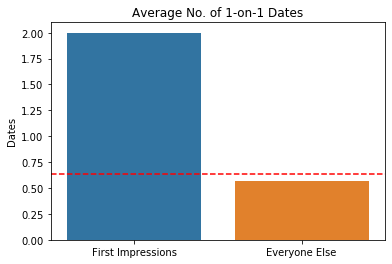

In [12]:
#Creating a new column for the total number of 1-on-1 dates per contestant. 
thebach['ONE_ON_ONE']=thebach.isin(['D1']).sum(axis=1)

#Refiltering for those who got a first impression rose and those who didn't:
first_impression2 = thebach.loc[thebach.ELIMINATION_1=='R1',:]
everyone_else2 = thebach.loc[thebach.ELIMINATION_1 !='R1',:]

#Looking at the average number of dates for first impression rose recipients
#versus everyone else:
avg_all = thebach['ONE_ON_ONE'].mean()
avg_fi = first_impression2['ONE_ON_ONE'].mean()
avg_ee = everyone_else2['ONE_ON_ONE'].mean()

#Graph of averages:
sns.barplot(x=['First Impressions','Everyone Else'],y=[avg_fi, avg_ee])
plt.title('Average No. of 1-on-1 Dates')
plt.ylabel('Dates')
#graphing the average for the entire dataset as a red line
plt.axhline(avg_all, linestyle = '--', c='r')
plt.show()

The data above shows that first impression rose recipients go on many more 1-on-1 dates on average than those who don't. This data, however, includes contestants that never went on a single 1-on-1 date! They could have been eliminated early enough in the season that they only went on group dates. Let's look at the averages when we only include contestants who went on at least one:

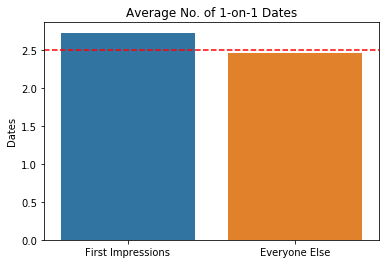

In [13]:
#Calculating the averages for contestants who went on at least one 1-on-1 date:
avg_all2 = thebach.loc[thebach.ONE_ON_ONE>0,:]['ONE_ON_ONE'].mean()
avg_fi2 = first_impression2.loc[first_impression2.ONE_ON_ONE>0,:]['ONE_ON_ONE'].mean()
avg_ee2 = everyone_else2.loc[everyone_else2.ONE_ON_ONE>0,:]['ONE_ON_ONE'].mean()

#Re-graphing the averages to show only contestants who went on a 1-on-1 date:
sns.barplot(x=['First Impressions','Everyone Else'],y=[avg_fi2, avg_ee2])
plt.title('Average No. of 1-on-1 Dates')
plt.ylabel('Dates')
#graphing the average for the entire dataset as a red line
plt.axhline(avg_all2, linestyle = '--', c='r')
plt.show()

Interestingly, the average number of 1-on-1 dates for everyone went up, including the first impression rose winners! This indicates that some first impression rose recipients were eliminated before getting the coveted 1-on-1 date. Also notable is that the average number of these dates isn't much lower for all other contestants.

So overall, both first impression recipients and the rest of the contestants get around the same number of 1-on-1 dates.

Last, as a fun and completely unrelated bonus, what are the most common names of contestants on the show?

In [14]:
#First, separating out the dataset into bachelor vs bachelorette:
bachelor = thebach.loc[thebach.SHOW=='Bachelor']
bachelorette = thebach.loc[thebach.SHOW=='Bachelorette']

#Finding the top 5 names from each show:
print('The Bachelor:',bachelor.CONTESTANT_FIRST.value_counts().nlargest(n=5,keep='all'))
print('\n')
print('The Bachelorette:' ,bachelorette.CONTESTANT_FIRST.value_counts().nlargest(n=5,keep='all'))

The Bachelor: AMBER      9
LAUREN     9
JESSICA    8
ASHLEY     7
AMANDA     7
Name: CONTESTANT_FIRST, dtype: int64


The Bachelorette: CHRIS       13
RYAN        12
BRIAN       11
NICK         8
JOSH         6
JOHN         6
JONATHAN     6
MICHAEL      6
BEN          6
ERIC         6
Name: CONTESTANT_FIRST, dtype: int64


Looks like a lot of Ambers and Laurens have been on the Bachelor, while the most common name for contestants on the Bachelorette is Chris!

To summarize, we've found that getting the first rose of the season (dubbed the "first impression rose") does indeed raise your chance of winning the competition. Around 15% of first impression rose recipients have gone on to win. For everyone else, the odds of winning does not increase. However, first impression rose recipients only get slightly more alone time with the Bachelor/Bachelorette than other contestants (who have also been on a 1-on-1 date).

This may point to initial attraction having a lasting impression on the Bachelor/Bachelorette. Given the show only lasts a couple of months, the Bachelor/Bachelorette has a limited window to get to know between 20 and 30 people, and choose one for an engagement. And each week, the Bachelor/Bachelorette has some control (with the help of the show's producers no doubt) over who they spend the most alone time with. So catching the Bachelor/Bachelorette's eye early is important!